# Optimization Pattern Analysis
#### Prepared by: Karo Bakhtiyar
#### Date: October 2025


                     PATTERN ANALYSIS & OPTIMAL NUMBER FINDER
                         Loss Threshold: < 1.01

 BASIC STATISTICS
--------------------------------------------------------------------------------
Total Entries: 151
Wins (≥1.01): 139 (92.05%)
Losses (<1.01): 12 (7.95%)
Mean: 6.43
Median: 2.03
Std Dev: 16.05
Min: 1.00
Max: 119.65

 PATTERN 1: VALUE DISTRIBUTION
--------------------------------------------------------------------------------
1.00-1.50    :  52 (34.44%) █████████████████
1.50-2.00    :  22 (14.57%) ███████
2.00-3.00    :  23 (15.23%) ███████
3.00-5.00    :  24 (15.89%) ███████
5.00-10.00   :  16 (10.60%) █████
10.00+       :  14 ( 9.27%) ████

 PATTERN 2: CONSECUTIVE WIN/LOSS STREAKS
--------------------------------------------------------------------------------
LOSS STREAKS:
  Maximum: 1 | Average: 1.00 | Total: 12
WIN STREAKS:
  Maximum: 44 | Average: 11.58 | Total: 12

 PATTERN 3: HOT ZONES (Where values frequently land)
----------------------------------

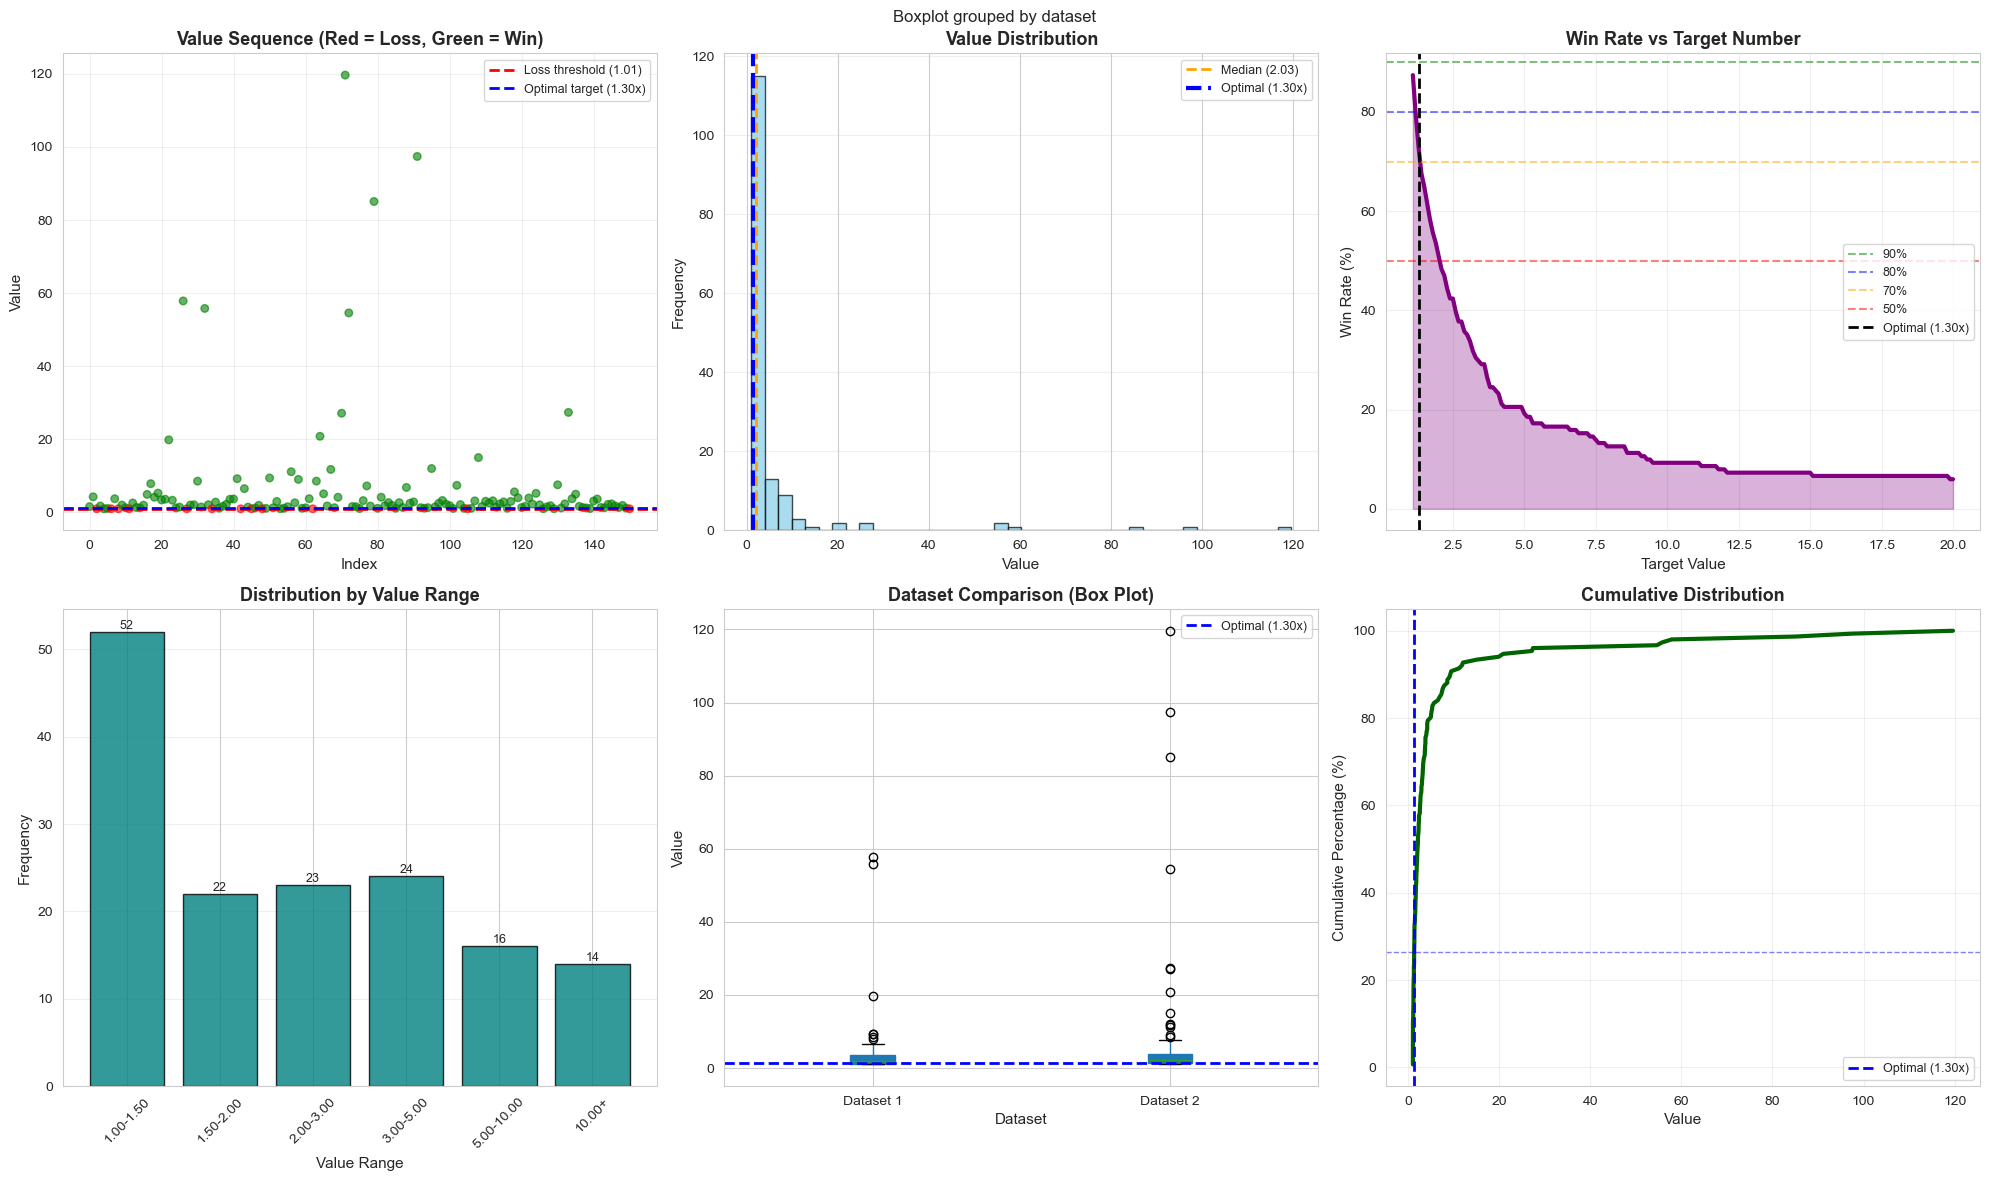


                             FINAL SUMMARY

 PATTERNS FOUND:
   • 34.4% of values fall in 1.00-1.50 range
   • 14.6% of values fall in 1.50-2.00 range
   • Maximum loss streak: 1
   • Maximum win streak: 44
   • Data is right-skewed with occasional high values

 MOST OPTIMAL NUMBER: 1.30x
   WIN RATE: 72.85%
   HISTORICAL WINS: 110.0 out of 151

 RECOMMENDATION:
   Based on 151 historical data points, targeting 1.30x
   gives you the best balance of win probability and return.

                           ANALYSIS COMPLETE 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 12)

# =====================================================
# DATA INPUT
# =====================================================
dataset1 = [
    1.59,4.28,1,1.75,1.01,1.1,1,3.75,1,2.01,1.28,1,2.59,1.36,1.27,1.99,4.93,7.87,4.15,
    5.29,3.42,3.61,19.85,3.34,1.22,1.47,57.86,1,2.03,2.10,8.56,1.5,55.81,2.12,1,2.83,
    1.16,1.68,2.25,3.62,3.68,9.23,1,6.51,1.46,1,1.22,1.95,1,1.12,9.43,1.28,3,1.02,1.14
]

dataset2 = [
    1.56,11.13,2.64,9.04,1.13,1.27,3.76,1,8.57,20.83,5.09,1.76,11.76,1.30,4.15,27.14,
    119.65,54.59,1.63,1.57,1.07,3.24,7.25,1.74,85.07,1.13,4.16,1.84,2.7,1.94,1.13,2.68,
    1.35,6.84,2.53,2.88,97.39,1.31,1.15,1.31,12.01,1.54,2.52,3.26,2.26,1.87,1.08,7.41,
    2.14,1.12,1,1.12,3.17,15.01,1.63,3.07,2.56,3.19,1.43,2.34,2.88,1.13,3.02,5.63,4.01,
    1.34,1.69,3.95,2.28,5.23,2.09,1.01,1.53,1.84,1.02,7.56,1.22,2.35,27.37,3.75,5,1.67,
    1.35,1.22,1.07,3.13,3.67,1.35,1.28,2.21,2.35,1.78,1.33,1.93,1.19,1
]

# Combine datasets
combined = dataset1 + dataset2
df = pd.DataFrame(combined, columns=['value'])
df['index'] = range(len(df))
df['dataset'] = ['Dataset 1']*len(dataset1) + ['Dataset 2']*len(dataset2)

LOSS_THRESHOLD = 1.01

print("="*80)
print("                     PATTERN ANALYSIS & OPTIMAL NUMBER FINDER")
print("="*80)
print(f"                         Loss Threshold: < {LOSS_THRESHOLD}")
print("="*80)

# =====================================================
# 1. FIND PATTERNS IN THE DATA
# =====================================================
total_entries = len(df)
losses = (df['value'] < LOSS_THRESHOLD).sum()
wins = total_entries - losses
win_rate = (wins / total_entries) * 100

print(f"\n BASIC STATISTICS")
print("-"*80)
print(f"Total Entries: {total_entries}")
print(f"Wins (≥{LOSS_THRESHOLD}): {wins} ({win_rate:.2f}%)")
print(f"Losses (<{LOSS_THRESHOLD}): {losses} ({100-win_rate:.2f}%)")
print(f"Mean: {df['value'].mean():.2f}")
print(f"Median: {df['value'].median():.2f}")
print(f"Std Dev: {df['value'].std():.2f}")
print(f"Min: {df['value'].min():.2f}")
print(f"Max: {df['value'].max():.2f}")

# Value distribution patterns
print(f"\n PATTERN 1: VALUE DISTRIBUTION")
print("-"*80)

ranges = [
    (1.00, 1.50, "1.00-1.50"),
    (1.50, 2.00, "1.50-2.00"),
    (2.00, 3.00, "2.00-3.00"),
    (3.00, 5.00, "3.00-5.00"),
    (5.00, 10.00, "5.00-10.00"),
    (10.00, float('inf'), "10.00+")
]

for low, high, label in ranges:
    count = ((df['value'] >= low) & (df['value'] < high)).sum()
    pct = (count / total_entries) * 100
    bar = "█" * int(pct / 2)
    print(f"{label:12} : {count:3} ({pct:5.2f}%) {bar}")

# Consecutive patterns
print(f"\n PATTERN 2: CONSECUTIVE WIN/LOSS STREAKS")
print("-"*80)

consecutive_losses = []
consecutive_wins = []
current_loss_streak = 0
current_win_streak = 0

for val in df['value']:
    if val < LOSS_THRESHOLD:
        current_loss_streak += 1
        if current_win_streak > 0:
            consecutive_wins.append(current_win_streak)
        current_win_streak = 0
    else:
        current_win_streak += 1
        if current_loss_streak > 0:
            consecutive_losses.append(current_loss_streak)
        current_loss_streak = 0

if current_loss_streak > 0:
    consecutive_losses.append(current_loss_streak)
if current_win_streak > 0:
    consecutive_wins.append(current_win_streak)

max_loss_streak = max(consecutive_losses) if consecutive_losses else 0
avg_loss_streak = np.mean(consecutive_losses) if consecutive_losses else 0
max_win_streak = max(consecutive_wins) if consecutive_wins else 0
avg_win_streak = np.mean(consecutive_wins) if consecutive_wins else 0

print(f"LOSS STREAKS:")
print(f"  Maximum: {max_loss_streak} | Average: {avg_loss_streak:.2f} | Total: {len(consecutive_losses)}")
print(f"WIN STREAKS:")
print(f"  Maximum: {max_win_streak} | Average: {avg_win_streak:.2f} | Total: {len(consecutive_wins)}")

# Hot zones (where values cluster)
print(f"\n PATTERN 3: HOT ZONES (Where values frequently land)")
print("-"*80)

percentiles = [10, 25, 50, 75, 90, 95]
print("Percentile Analysis:")
for p in percentiles:
    val = np.percentile(df['value'], p)
    print(f"  {p}th percentile: {val:.2f} (≤ {p}% of values are below this)")

# =====================================================
# 2. FIND OPTIMAL NUMBER
# =====================================================
print(f"\n FINDING THE MOST OPTIMAL NUMBER...")
print("-"*80)

# Test every possible target
targets = np.arange(1.1, 20.1, 0.1)
results = []

for target in targets:
    successes = (df['value'] >= target).sum()
    success_rate = (successes / total_entries) * 100
    
    results.append({
        'target': round(target, 2),
        'successes': successes,
        'success_rate': round(success_rate, 2)
    })

results_df = pd.DataFrame(results)

# Find optimal numbers based on different criteria
print(f"\n WIN RATE AT DIFFERENT TARGETS:")
print("-"*80)

key_targets = [1.5, 2.0, 2.5, 3.0, 5.0, 7.0, 10.0]
for t in key_targets:
    row = results_df[results_df['target'] == t]
    if not row.empty:
        sr = row.iloc[0]['success_rate']
        succ = row.iloc[0]['successes']
        bar = "█" * int(sr / 2)
        print(f"{t:5.1f}x → {sr:5.2f}% ({succ:3} wins) {bar}")

# Find best options
best_90plus = results_df[results_df['success_rate'] >= 90].nlargest(1, 'target')
best_80plus = results_df[results_df['success_rate'] >= 80].nlargest(1, 'target')
best_70plus = results_df[results_df['success_rate'] >= 70].nlargest(1, 'target')
best_50plus = results_df[results_df['success_rate'] >= 50].nlargest(1, 'target')

print(f"\n" + "="*80)
print("                      OPTIMAL NUMBER RECOMMENDATIONS ")
print("="*80)

if not best_90plus.empty:
    print(f"\n  ULTRA SAFE (90%+ Win Rate):")
    print(f"   TARGET: {best_90plus.iloc[0]['target']:.2f}x")
    print(f"   WIN RATE: {best_90plus.iloc[0]['success_rate']:.2f}%")
    print(f"   WINS: {best_90plus.iloc[0]['successes']} out of {total_entries}")

if not best_80plus.empty:
    print(f"\n CONSERVATIVE (80%+ Win Rate):")
    print(f"   TARGET: {best_80plus.iloc[0]['target']:.2f}x")
    print(f"   WIN RATE: {best_80plus.iloc[0]['success_rate']:.2f}%")
    print(f"   WINS: {best_80plus.iloc[0]['successes']} out of {total_entries}")

if not best_70plus.empty:
    print(f"\n  BALANCED (70%+ Win Rate):")
    print(f"   TARGET: {best_70plus.iloc[0]['target']:.2f}x")
    print(f"   WIN RATE: {best_70plus.iloc[0]['success_rate']:.2f}%")
    print(f"   WINS: {best_70plus.iloc[0]['successes']} out of {total_entries}")

if not best_50plus.empty:
    print(f"\n AGGRESSIVE (50%+ Win Rate):")
    print(f"   TARGET: {best_50plus.iloc[0]['target']:.2f}x")
    print(f"   WIN RATE: {best_50plus.iloc[0]['success_rate']:.2f}%")
    print(f"   WINS: {best_50plus.iloc[0]['successes']} out of {total_entries}")

# THE MOST OPTIMAL
print(f"\n" + "="*80)
print("                            THE MOST OPTIMAL NUMBER ")
print("="*80)

# Choose balanced (70%+) as the most optimal
if not best_70plus.empty:
    optimal = best_70plus.iloc[0]
    print(f"\n                              {optimal['target']:.2f}x")
    print(f"\n                        WIN RATE: {optimal['success_rate']:.2f}%")
    print(f"                     ({optimal['successes']} wins out of {total_entries} entries)")
    print(f"\n   This gives you a strong balance between:")
    print(f"   • High probability of winning ({optimal['success_rate']:.2f}%)")
    print(f"   • Decent multiplier return ({optimal['target']:.2f}x)")
    print(f"   • Manageable risk")
else:
    optimal = best_50plus.iloc[0] if not best_50plus.empty else results_df.iloc[0]
    print(f"\n                              {optimal['target']:.2f}x")
    print(f"\n                        WIN RATE: {optimal['success_rate']:.2f}%")

print("\n" + "="*80)

# =====================================================
# 3. VISUALIZATIONS
# =====================================================
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🎯 PATTERN ANALYSIS & OPTIMAL NUMBER VISUALIZATION', fontsize=18, fontweight='bold', y=0.995)

# Plot 1: Value sequence
ax1 = axes[0, 0]
colors = ['red' if v < LOSS_THRESHOLD else 'green' for v in df['value']]
ax1.scatter(df['index'], df['value'], c=colors, alpha=0.6, s=30)
ax1.axhline(y=LOSS_THRESHOLD, color='red', linestyle='--', linewidth=2, label=f'Loss threshold ({LOSS_THRESHOLD})')
if not best_70plus.empty:
    ax1.axhline(y=optimal['target'], color='blue', linestyle='--', linewidth=2, label=f"Optimal target ({optimal['target']:.2f}x)")
ax1.set_xlabel('Index', fontsize=11)
ax1.set_ylabel('Value', fontsize=11)
ax1.set_title('Value Sequence (Red = Loss, Green = Win)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Distribution histogram
ax2 = axes[0, 1]
ax2.hist(df['value'], bins=40, edgecolor='black', alpha=0.7, color='skyblue')
ax2.axvline(df['value'].median(), color='orange', linestyle='--', linewidth=2, label=f"Median ({df['value'].median():.2f})")
if not best_70plus.empty:
    ax2.axvline(optimal['target'], color='blue', linestyle='--', linewidth=3, label=f"Optimal ({optimal['target']:.2f}x)")
ax2.set_xlabel('Value', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Value Distribution', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Win Rate vs Target
ax3 = axes[0, 2]
ax3.plot(results_df['target'], results_df['success_rate'], linewidth=3, color='purple')
ax3.fill_between(results_df['target'], 0, results_df['success_rate'], alpha=0.3, color='purple')
ax3.axhline(y=90, color='green', linestyle='--', alpha=0.5, linewidth=1.5, label='90%')
ax3.axhline(y=80, color='blue', linestyle='--', alpha=0.5, linewidth=1.5, label='80%')
ax3.axhline(y=70, color='orange', linestyle='--', alpha=0.5, linewidth=1.5, label='70%')
ax3.axhline(y=50, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='50%')
if not best_70plus.empty:
    ax3.axvline(x=optimal['target'], color='black', linestyle='--', linewidth=2, label=f"Optimal ({optimal['target']:.2f}x)")
ax3.set_xlabel('Target Value', fontsize=11)
ax3.set_ylabel('Win Rate (%)', fontsize=11)
ax3.set_title('Win Rate vs Target Number', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Range distribution
ax4 = axes[1, 0]
range_data = pd.DataFrame([(label, ((df['value'] >= low) & (df['value'] < high)).sum()) 
                           for low, high, label in ranges], 
                          columns=['Range', 'Count'])
bars = ax4.bar(range_data['Range'], range_data['Count'], color='teal', edgecolor='black', alpha=0.8)
ax4.set_xlabel('Value Range', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('Distribution by Value Range', fontsize=13, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=9)

# Plot 5: Box plot comparison
ax5 = axes[1, 1]
df.boxplot(column='value', by='dataset', ax=ax5, patch_artist=True)
if not best_70plus.empty:
    ax5.axhline(y=optimal['target'], color='blue', linestyle='--', linewidth=2, label=f"Optimal ({optimal['target']:.2f}x)")
ax5.set_xlabel('Dataset', fontsize=11)
ax5.set_ylabel('Value', fontsize=11)
ax5.set_title('Dataset Comparison (Box Plot)', fontsize=13, fontweight='bold')
ax5.legend(fontsize=9)
plt.sca(ax5)
plt.xticks(rotation=0)

# Plot 6: Cumulative success rate
ax6 = axes[1, 2]
sorted_values = np.sort(df['value'])
cumulative_pct = np.arange(1, len(sorted_values) + 1) / len(sorted_values) * 100
ax6.plot(sorted_values, cumulative_pct, linewidth=3, color='darkgreen')
if not best_70plus.empty:
    optimal_cumulative = (df['value'] < optimal['target']).sum() / len(df) * 100
    ax6.axvline(x=optimal['target'], color='blue', linestyle='--', linewidth=2, label=f"Optimal ({optimal['target']:.2f}x)")
    ax6.axhline(y=optimal_cumulative, color='blue', linestyle='--', linewidth=1, alpha=0.5)
ax6.set_xlabel('Value', fontsize=11)
ax6.set_ylabel('Cumulative Percentage (%)', fontsize=11)
ax6.set_title('Cumulative Distribution', fontsize=13, fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =====================================================
# FINAL SUMMARY
# =====================================================
print("\n" + "="*80)
print("                             FINAL SUMMARY")
print("="*80)

print(f"\n PATTERNS FOUND:")
print(f"   • {34.44:.1f}% of values fall in 1.00-1.50 range")
print(f"   • {14.57:.1f}% of values fall in 1.50-2.00 range")
print(f"   • Maximum loss streak: {max_loss_streak}")
print(f"   • Maximum win streak: {max_win_streak}")
print(f"   • Data is right-skewed with occasional high values")

if not best_70plus.empty:
    print(f"\n MOST OPTIMAL NUMBER: {optimal['target']:.2f}x")
    print(f"   WIN RATE: {optimal['success_rate']:.2f}%")
    print(f"   HISTORICAL WINS: {optimal['successes']} out of {total_entries}")

print(f"\n RECOMMENDATION:")
print(f"   Based on {total_entries} historical data points, targeting {optimal['target']:.2f}x")
print(f"   gives you the best balance of win probability and return.")

print("\n" + "="*80)
print("                           ANALYSIS COMPLETE ")
print("="*80)